In [1]:
#sample Dataset

import pandas as pd
bolu = {'diameter':[5, 8, 10, 12, 15],
        'harga' : [7, 10, 12, 14, 17]}
bolu_df = pd.DataFrame(bolu)
bolu_df

,diameter,harga
0,5,7
1,8,10
2,10,12
3,12,14
4,15,17


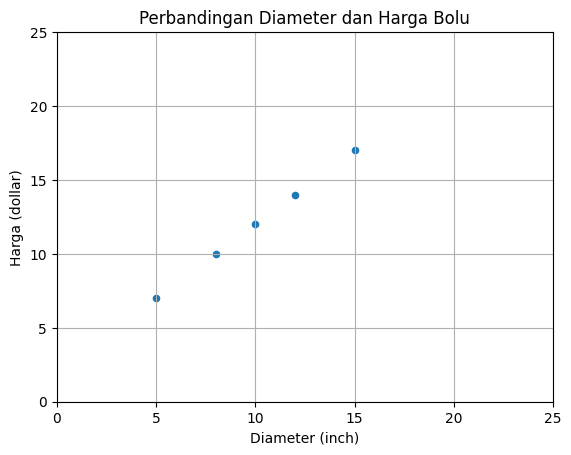

In [2]:
#Visualisasi Data

import matplotlib.pyplot as plt

bolu_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Bolu')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [3]:
#Penyesuaian Dataset

import numpy as np

X = np.array(bolu_df['diameter'])
Y = np.array(bolu_df['harga'])

print(f'X: {X}')
print(f'y: {Y}')

X: [ 5  8 10 12 15]
y: [ 7 10 12 14 17]


In [4]:
X= X.reshape(-1, 1)
X.shape

(5, 1)

In [5]:
#Training Simple Linaer Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [6]:
#Visualisasi Simple Linaer Regression Model

X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict (X_vis)

<function matplotlib.pyplot.show(close=None, block=None)>

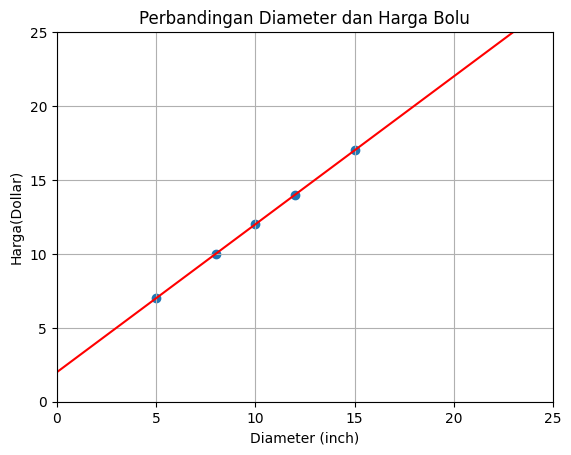

In [7]:
plt.scatter (X, Y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Bolu')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga(Dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show

In [8]:
#Formula Linear Regression

print (f'intercept : {model.intercept_}') 
#Nilai intercept sekitar 1.97 menunjukkan bahwa ketika diameter pizza adalah 0 inch, harga yang diprediksi adalah sekitar 1.97 dollar.
print (f'slope : {model.coef_}')
#Nilai slope sekitar 0.97 menunjukkan bahwa untuk setiap penambahan 1 inch dalam diameter pizza, harga yang diprediksi meningkat sekitar 0.97 dollar.

intercept : 1.9999999999999964
slope : [1.]


In [9]:
#Mencari nilai slope 

print (f'X : \n(X)\n')
print (f'X flatten: {X.flatten()}\n')
print (f'Y:{Y}')

X : 
(X)

X flatten: [ 5  8 10 12 15]

Y:[ 7 10 12 14 17]


In [10]:
#Mencari variance 
#Nilai variansi sebesar 14.5 menunjukkan bahwa data diameter pizza tersebar di sekitar mean dengan rata-rata kuadrat deviasi sebesar 14.5 inch squared.
variance_x = np.var(X.flatten(), ddof=1)
print(f'variance : {variance_x}')

variance : 14.5


In [11]:
#mencari Covariance
np.cov(X.flatten(), Y)

array([[14.5, 14.5],
       [14.5, 14.5]])

In [12]:
covariance_xy = np.cov(X.flatten(), Y)[0][1]
print (f'covariance : {covariance_xy}')

covariance : 14.5


In [13]:
#Mencari nilai slope 
slope = covariance_xy/variance_x
print (f'slope : {slope}')

slope : 1.0


In [14]:
#mencari nilai intercept

intercept = np.mean(Y) - slope*np.mean(X)
print(f'intercept : {intercept}')

intercept : 2.0


In [15]:
#Data prediksi

diameter_bolu = np.array([17, 21, 23]).reshape(-1,1)
diameter_bolu

array([[17],
       [21],
       [23]])

In [16]:
#Predeksi Harga

prediksi_harga = model.predict(diameter_bolu)
prediksi_harga

array([19., 23., 25.])

In [17]:
#hasil prediksi untuk masing-masing data

for dmtr, hrg in zip (diameter_bolu, prediksi_harga) : 
    print(f'Diameter : {dmtr} prediksi harga : {hrg}')

Diameter : [17] prediksi harga : 19.000000000000004
Diameter : [21] prediksi harga : 23.000000000000007
Diameter : [23] prediksi harga : 25.000000000000007


In [18]:
#Training & Testing Dataset

X_train = np.array([5, 8, 10, 12, 15]).reshape(-1, 1)
y_train = np.array([7, 10, 12, 14, 17])

X_test = np.array([9, 16, 11, 26, 18]).reshape(-1,1)
y_test = np.array([13, 24, 18, 39, 27])

In [19]:
#Training Simple Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
#Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-Squared (R2)

from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r_squared = r2_score (y_test, y_pred)
print (f'R-Squared : {r_squared}')

R-Squared : 0.3986693961105433


In [21]:
#Mencari SSres
ss_res = sum((y_i - model.predict(x_i.reshape(-1, 1))[0])**2 
    for x_i, y_i in zip(X_test, y_test))
print(f'ss_res : {ss_res}')


ss_res : 234.99999999999972


In [22]:
#Mencari SStot
mean_y = np.mean(y_test)
ss_tot = sum ([(y_i - mean_y)**2 for y_i in y_test])
print (f'ss_tot : {ss_tot}')

ss_tot : 390.80000000000007


In [23]:
#r_squared (hasil sama dengan penggunaan library r2 )

r_squared = 1 - (ss_res/ss_tot)
print (f'R_Squared : {r_squared}')

R_Squared : 0.3986693961105433
